In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
import collections

In [79]:
def get_degree_list(filename,n=15):
    data = pd.read_csv(filename)
    graph = nx.Graph()
    for index,row in data.iterrows():
        graph.add_edges_from([(row['# Protein-1'],row['# Protein-2'])],weight = 1)
    temp = sorted(graph.degree, key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(temp[:n],columns=['Proteins','Value'])
    return df

def get_data(filename,n=15):
    data = pd.read_csv(filename)
    data = data.sort_values(['col2'])[-n:].reset_index().drop(['index'],axis=1)
    return data

# Bone Cancer

## Degree

In [56]:
bone_cancer_degree = get_degree_list('data/Bone-Cancer.csv')
bone_normal_degree = get_degree_list('data/Bone-Normal.csv')

In [57]:
bone_cancer_degree

,Proteins,Value
0,STAT1,66
1,FYN,63
2,SMAD3,63
3,STAT5B,50
4,ERK1,50
5,LYN,47
6,HDAC1,45
7,STAT3,44
8,CSK,43
9,SRC,41


In [58]:
bone_normal_degree

,Proteins,Value
0,SMAD3,40
1,FYN,38
2,ERK1,32
3,HDAC1,30
4,RELA,28
5,CSK,27
6,STAT5B,27
7,STAT3,24
8,GRB2,22
9,VAV1,22


In [64]:
bone_c_matching = []
bone_n_matching = []

bone_list = pd.read_csv('list_from_enrichr.csv')
for name in bone_cancer_degree['Proteins']:
    if name in bone_list['BONE'].to_list():
        bone_c_matching.append(name)
print('Matching cancer genes(Bone): ',bone_c_matching)

for name in bone_normal_degree['Proteins']:
    if name in bone_list['BONE'].to_list():
        bone_n_matching.append(name)
print('Matching normal genes(Bone): ',bone_n_matching)

Matching cancer genes(Bone):  ['STAT3']
Matching normal genes(Bone):  ['CTNNB1', 'STAT3']


## Betweenness

In [4]:
bone_cancer_betweenness = get_data('Implementation/BoneCancer_betweennessscentrality.csv')
bone_normal_betweenness = get_data('Implementation/BoneNormal_betweennessscentrality.csv')


In [5]:
bone_cancer_betweenness

,col1,col2
0,PRKCA,0.026651
1,RAN,0.027669
2,MAPK14,0.032367
3,STAT3,0.032379
4,TP53,0.032380
5,LYN,0.033543
6,DVL1,0.034980
7,RELA,0.047536
8,ERK1,0.051168
9,STAT1,0.053225


In [6]:
bone_c_matching = []
bone_n_matching = []

bone_list = pd.read_csv('list_from_enrichr.csv')
for name in bone_cancer_betweenness['col1']:
    if name in bone_list['BONE'].to_list():
        bone_c_matching.append(name)
print('Matching cancer genes(Bone): ',bone_c_matching)

for name in bone_normal_betweenness['col1']:
    if name in bone_list['BONE'].to_list():
        bone_n_matching.append(name)
print('Matching normal genes(Bone): ',bone_n_matching)

Matching cancer genes(Bone):  ['STAT3', 'TP53', 'CTNNB1']
Matching normal genes(Bone):  ['CCND1', 'STAT3', 'CTNNB1']


In [17]:
temp = pd.read_csv('Implementation/BoneCancer_betweennessscentrality.csv')
temp_list=['EXT1','EXT2','RECQL4','WRN']
for i in range(len(temp['col1'])):
    if temp['col1'][i] in temp_list:
        print(temp['col1'][i],temp['col2'][i])

# Breast Cancer

## Degree

In [216]:
breast_cancer_degree = get_degree_list('data/Breast-Cancer.csv')
breast_normal_degree = get_degree_list('data/Breast-Normal.csv')

In [217]:
breast_cancer_degree

,Proteins,Value
0,SMAD2,98
1,FYN,94
2,SMAD3,93
3,STAT5A,92
4,STAT1,92
5,ERK1,78
6,LYN,66
7,RAF1,65
8,GRB2,65
9,EGFR,65


In [218]:
breast_normal_degree

,Proteins,Value
0,SMAD2,66
1,SMAD3,64
2,STAT5A,60
3,STAT1,60
4,ERK1,56
5,JAK2,55
6,HDAC1,49
7,RELA,44
8,CBL,42
9,STAT5B,42


In [219]:
breast_c_matching = []
breast_n_matching = []

breast_list = pd.read_csv('list_from_enrichr.csv')
for name in breast_cancer_degree['Proteins']:
    if name in breast_list['BREAST'].to_list():
        breast_c_matching.append(name)
print('Matching cancer genes(Breast): ',breast_c_matching)

for name in breast_normal_degree['Proteins']:
    if name in breast_list['BREAST'].to_list():
        breast_n_matching.append(name)
print('Matching normal genes(Breast): ',breast_n_matching)

Matching cancer genes(Breast):  ['EGFR', 'STAT3']
Matching normal genes(Breast):  ['EGFR', 'STAT3']


## Betweenness

In [7]:
breast_cancer_betweenness = get_data('Implementation/BreastCancer_betweennessscentrality.csv')
breast_normal_betweenness = get_data('Implementation/BreastNormal_betweennessscentrality.csv')


In [8]:
breast_normal_betweenness

,col1,col2
0,FOS,0.029568
1,LYN,0.030431
2,APC,0.031355
3,EGFR,0.032673
4,STAT1,0.033108
5,TP53,0.033721
6,JAK2,0.035107
7,CTNNB1,0.035857
8,RAF1,0.035989
9,STAT5A,0.054978


In [9]:
breast_cancer_betweenness

,col1,col2
0,FOS,0.029568
1,LYN,0.030431
2,APC,0.031355
3,EGFR,0.032673
4,STAT1,0.033108
5,TP53,0.033721
6,JAK2,0.035107
7,CTNNB1,0.035857
8,RAF1,0.035989
9,STAT5A,0.054978


In [10]:
breast_c_matching = []
breast_n_matching = []

breast_list = pd.read_csv('list_from_enrichr.csv')
for name in breast_cancer_betweenness['col1']:
    if name in breast_list['BREAST'].to_list():
        breast_c_matching.append(name)
print('Matching cancer genes(Breast): ',breast_c_matching)

for name in breast_normal_betweenness['col1']:
    if name in breast_list['BREAST'].to_list():
        breast_n_matching.append(name)
print('Matching cancer genes(Breast): ',breast_n_matching)

Matching cancer genes(Breast):  ['EGFR', 'TP53', 'CTNNB1']
Matching cancer genes(Breast):  ['EGFR', 'TP53', 'CTNNB1']


In [11]:
temp = pd.read_csv('Implementation/BreastCancer_betweennessscentrality.csv')
temp_list=['APOBEC3B',
'BARD1',
'BRIP1',
'CHEK2',
'IRS4',
'PALB2',
'POLQ',
'PPM1D',
'SALL4']
for i in range(len(temp['col1'])):
    if temp['col1'][i] in temp_list:
        print(temp['col1'][i],temp['col2'][i])

# Liver Cancer

## Degree

In [227]:
Liver_cancer_degree = get_degree_list('data/Liver-Cancer.csv')
Liver_normal_degree = get_degree_list('data/Liver-Normal.csv')

In [228]:
Liver_cancer_degree

,Proteins,Value
0,FYN,114
1,STAT5A,111
2,SMAD2,110
3,STAT1,108
4,SMAD3,106
5,LYN,84
6,STAT5B,84
7,GRB2,80
8,SRC,80
9,STAT3,80


In [229]:
Liver_normal_degree

,Proteins,Value
0,STAT1,54
1,CREBBP,53
2,FYN,52
3,SMAD2,51
4,JAK2,47
5,RELA,35
6,STAT3,35
7,CSK,33
8,EGFR,29
9,BTK,28


In [ ]:
Liver_c_matching = []
Liver_n_matching = []

Liver_list = pd.read_csv('list_from_enrichr.csv')
for name in Liver_cancer_degree['Proteins']:
    if name in Liver_list['LIVER'].to_list():
        Liver_c_matching.append(name)
print('Matching cancer genes(Liver): ',Liver_c_matching)

for name in Liver_normal_degree['Proteins']:
    if name in Liver_list['LIVER'].to_list():
        Liver_n_matching.append(name)
print('Matching normal genes(Liver): ',Liver_n_matching)

Matching cancer genes(Breast):  ['EGFR', 'STAT3']
Matching normal genes(Breast):  ['EGFR', 'STAT3']


## Betweenness

In [12]:
Liver_cancer_betweenness = get_data('Implementation/LiverCancer_betweennessscentrality.csv')
Liver_normal_betweenness = get_data('Implementation/LiverNormal_betweennessscentrality.csv')


In [13]:
Liver_normal_betweenness

,col1,col2
0,NFKB1,0.033881
1,RAN,0.034451
2,POLR2H,0.035125
3,NRAS,0.035519
4,STAT3,0.037299
5,APC,0.037456
6,TP53,0.037631
7,HDAC2,0.042448
8,CTNNB1,0.048483
9,STAT1,0.057029


In [14]:
Liver_cancer_betweenness

,col1,col2
0,FOS,0.022483
1,STAT3,0.023442
2,TCF3,0.023757
3,SRC,0.024127
4,JUN,0.025743
5,RAF1,0.027930
6,ERK1,0.029250
7,STAT1,0.031903
8,STAT5A,0.041954
9,CTNNB1,0.044286


In [15]:
Liver_c_matching = []
Liver_n_matching = []

Liver_list = pd.read_csv('list_from_enrichr.csv')
for name in Liver_cancer_betweenness['col1']:
    if name in Liver_list['LIVER'].to_list():
        Liver_c_matching.append(name)
print('Matching cancer genes(Liver): ',Liver_c_matching)

for name in Liver_normal_betweenness['col1']:
    if name in Liver_list['LIVER'].to_list():
        Liver_n_matching.append(name)
print('Matching normal genes(Liver): ',Liver_n_matching)

Matching cancer genes(Liver):  ['FOS', 'STAT3', 'SRC', 'JUN', 'CTNNB1']
Matching normal genes(Liver):  ['STAT3', 'TP53', 'CTNNB1']


In [16]:
temp = pd.read_csv('Implementation/LiverCancer_betweennessscentrality.csv')
temp_list=['ARID1B','ARID2','AXIN1','AXIN2','DNAJB1','FAT4','HNF1A','IL6ST','PRKACA','PTPN13','SMAD2','TERT']
for i in range(len(temp['col1'])):
    if temp['col1'][i] in temp_list:
        print(temp['col1'][i],temp['col2'][i])

SMAD2 0.0528466979659939
AXIN1 0.0063772165051453
PRKACA 0.0040875849424069


# Colon Cancer

## Degree

In [236]:
Colon_cancer_degree = get_degree_list('data/Colon-Cancer.csv')
Colon_normal_degree = get_degree_list('data/Colon-Normal.csv')

In [237]:
Colon_cancer_degree

,Proteins,Value
0,FYN,98
1,CREBBP,97
2,SMAD2,95
3,STAT5A,93
4,STAT1,93
5,JAK2,92
6,SMAD3,92
7,ERK1,77
8,STAT5B,70
9,LYN,67


In [240]:
Colon_normal_degree

,Proteins,Value
0,CREBBP,63
1,STAT5A,57
2,STAT1,57
3,SMAD2,54
4,HDAC1,47
5,ERK1,45
6,STAT5B,43
7,STAT3,41
8,CSK,39
9,GRB2,38


In [242]:
Colon_c_matching = []
Colon_n_matching = []

Colon_list = pd.read_csv('list_from_enrichr.csv')
for name in Colon_cancer_degree['Proteins']:
    if name in Colon_list['COLON'].to_list():
        Colon_c_matching.append(name)
print('Matching cancer genes(Colon): ',Colon_c_matching)

for name in Colon_normal_degree['Proteins']:
    if name in Colon_list['COLON'].to_list():
        Colon_n_matching.append(name)
print('Matching normal genes(Colon): ',Colon_n_matching)

Matching cancer genes(Colon):  ['STAT3', 'SRC', 'KIT']
Matching normal genes(Colon):  ['STAT3', 'FOS']


## Betweenness

In [17]:
Colon_cancer_betweenness = get_data('Implementation/ColonCancer_betweennessscentrality.csv')
Colon_normal_betweenness = get_data('Implementation/ColonNormal_betweennessscentrality.csv')


In [18]:
Colon_normal_betweenness

,col1,col2
0,HGS,0.029755
1,CSK,0.029933
2,RAF1,0.030870
3,ABL1,0.032669
4,GRB2,0.033639
5,SP1,0.036592
6,FOS,0.038446
7,STAT1,0.045055
8,ERK1,0.047911
9,RELA,0.052376


In [19]:
Colon_cancer_betweenness

,col1,col2
0,STAT5B,0.020146
1,POLR2H,0.020790
2,STAT3,0.021209
3,STAT1,0.025497
4,RAF1,0.026244
5,ERK1,0.030897
6,JAK2,0.032269
7,STAT5A,0.032923
8,CTNNB1,0.034077
9,SMAD2,0.038732


In [20]:
Colon_c_matching = []
Colon_n_matching = []

Colon_list = pd.read_csv('list_from_enrichr.csv')
for name in Colon_cancer_betweenness['col1']:
    if name in Colon_list['COLON'].to_list():
        Colon_c_matching.append(name)
print('Matching cancer genes(Colon): ',Colon_c_matching)

for name in Colon_normal_betweenness['col1']:
    if name in Colon_list['COLON'].to_list():
        Colon_n_matching.append(name)
print('Matching normal genes(Colon): ',Colon_n_matching)

Matching cancer genes(Colon):  ['STAT3', 'CTNNB1']
Matching normal genes(Colon):  ['FOS', 'CTNNB1']


In [21]:
temp = pd.read_csv('Implementation/ColonCancer_betweennessscentrality.csv')
temp_list=['ARHGAP5','ARHGEF10','BAZ1A','CNBD1','LEPROTL1','RAD17','USP44','AXIN2','BAX','BCL9L','MLH1','MSH2','MSH6','PMS1','PMS2','POLE','PTPRT','QKI','SALL4','SFRP4','SIRPA','SRC','STAG1','TGFBR2','ZNRF3']
for i in range(len(temp['col1'])):
    if temp['col1'][i] in temp_list:
        print(temp['col1'][i],temp['col2'][i])

SRC 0.01899245997236
TGFBR2 0.0010247783753255


# Kidney Cancer

## Degree

In [248]:
Kidney_cancer_degree = get_degree_list('data/Kidney-Cancer.csv')
Kidney_normal_degree = get_degree_list('data/Kidney-Normal.csv')

In [249]:
Kidney_cancer_degree

,Proteins,Value
0,FYN,91
1,SMAD2,84
2,CREBBP,83
3,JAK2,81
4,SMAD3,81
5,STAT1,78
6,ERK1,71
7,STAT5B,62
8,LYN,61
9,GRB2,61


In [250]:
Kidney_normal_degree

,Proteins,Value
0,STAT5A,59
1,SMAD2,51
2,STAT1,51
3,CREBBP,50
4,SMAD3,49
5,GRB2,39
6,STAT3,39
7,RAF1,38
8,RELA,36
9,HDAC1,36


In [251]:
Kidney_c_matching = []
Kidney_n_matching = []

Kidney_list = pd.read_csv('list_from_enrichr.csv')
for name in Kidney_cancer_degree['Proteins']:
    if name in Kidney_list['KIDNEY'].to_list():
        Kidney_c_matching.append(name)
print('Matching cancer genes(Kidney): ',Kidney_c_matching)

for name in Kidney_normal_degree['Proteins']:
    if name in Kidney_list['KIDNEY'].to_list():
        Kidney_n_matching.append(name)
print('Matching normal genes(Kidney): ',Kidney_n_matching)

Matching cancer genes(Kidney):  ['SRC', 'STAT3']
Matching normal genes(Kidney):  ['STAT3', 'EGFR', 'CTNNB1', 'TP53']


## Betweenness

In [22]:
Kidney_cancer_betweenness = get_data('Implementation/KidneyCancer_betweennessscentrality.csv')
Kidney_normal_betweenness = get_data('Implementation/KidneyNormal_betweennessscentrality.csv')


In [23]:
Kidney_normal_betweenness

,col1,col2
0,HDAC2,0.027666
1,RAN,0.029496
2,MAPK14,0.032975
3,ANKRD6,0.034701
4,STAT1,0.041527
5,STAT3,0.041553
6,GRB2,0.047411
7,RAF1,0.053984
8,SMAD2,0.057545
9,HDAC1,0.059946


In [24]:
Kidney_cancer_betweenness

,col1,col2
0,ABL1,0.022559
1,SRC,0.022594
2,STAT3,0.023550
3,STAT1,0.025994
4,BRCA1,0.026034
5,RAF1,0.033995
6,JAK2,0.035649
7,CTNNB1,0.037434
8,ERK1,0.038053
9,RELA,0.043294


In [25]:
Kidney_c_matching = []
Kidney_n_matching = []

Kidney_list = pd.read_csv('list_from_enrichr.csv')
for name in Kidney_cancer_betweenness['col1']:
    if name in Kidney_list['KIDNEY'].to_list():
        Kidney_c_matching.append(name)
print('Matching cancer genes(Kidney): ',Kidney_c_matching)

for name in Kidney_normal_betweenness['col1']:
    if name in Kidney_list['KIDNEY'].to_list():
        Kidney_n_matching.append(name)
print('Matching normal genes(Kidney): ',Kidney_n_matching)

Matching cancer genes(Kidney):  ['SRC', 'STAT3', 'BRCA1', 'CTNNB1']
Matching normal genes(Kidney):  ['STAT3', 'CTNNB1']


In [26]:
temp = pd.read_csv('Implementation/KidneyCancer_betweennessscentrality.csv')
temp_list=['BAP1','PTPRD','ARIDI1','KDM6A','MALAT1','MTOR','TFEB']
for i in range(len(temp['col1'])):
    if temp['col1'][i] in temp_list:
        print(temp['col1'][i],temp['col2'][i])

# Regulation

In [108]:

def get_betweenness(filename,n=15):
    data = pd.read_csv(filename)
    graph = nx.Graph()
    for index,row in data.iterrows():
        graph.add_edges_from([(row['# Protein-1'],row['# Protein-2'])],weight = 1)
    arr = nx.betweenness_centrality(graph,normalized=False)
    arr = collections.Counter(arr)
    temp=[]
    for tag, count in arr.items():  
        temp.append([tag,count])
    temp = pd.DataFrame(temp,columns=['col1','col2'])
    temp = temp.sort_values(['col2'])[-n:].reset_index().drop(['index'],axis=1)
    return temp
bone_cancer_betweenness = get_betweenness('data/Bone-Cancer.csv')
bone_normal_betweenness = get_betweenness('data/Bone-Normal.csv')

In [109]:
name = []
value = []

for i in range(len(bone_cancer_betweenness)):
    for j in range(len(bone_normal_betweenness)):
        if bone_cancer_betweenness['col1'][i]==bone_normal_betweenness['col1'][j]:
            name.append(bone_cancer_betweenness['col1'][i])
            value.append(bone_cancer_betweenness['col2'][i] -bone_normal_betweenness['col2'][j])
            

In [110]:
regulation = pd.DataFrame(np.transpose([name,value]),columns=['Name','Value'])
regulation

,Name,Value
0,RAN,379.1845996116224
1,STAT3,1281.9526729352592
2,DVL1,991.1370318865786
3,RELA,1375.180776957207
4,ERK1,1323.2964146498025
5,STAT5B,2713.211629348292
6,CTNNB1,1263.7291433756295
7,HDAC1,1261.8274489997657
8,FYN,2117.539375747942
9,SMAD3,3318.2666575169046


In [50]:
for i in range(len(bone_normal_betweenness)):
    if bone_cancer_betweenness['col1'][i] not in name:
        name.append(bone_cancer_betweenness['col1'][i])
        value.append(bone_cancer_betweenness['col2'][i])

In [51]:
regulation = pd.DataFrame(np.transpose([name,value]),columns=['Name','Value'])
regulation

,Name,Value
0,RAN,-0.04456629635229149
1,STAT3,-0.005955410408069801
2,DVL1,-0.02813691463025931
3,RELA,-0.03667811531060249
4,ERK1,-0.048131855866307
5,STAT5B,0.0166035399471047
6,CTNNB1,-0.0727787349968327
7,HDAC1,-0.07961473867886451
8,FYN,-0.049749814924211
9,SMAD3,-0.03872064827900741


In [61]:
bone_cancer = get_data('Implementation/BoneCancer_degreecentrality.csv')
bone_normal = get_data('Implementation/BoneNormal_degreecentrality.csv')

In [67]:
bone_cancer

,col1,col2
0,CRKL,0.100000
1,CBL,0.108571
2,ABL1,0.108571
3,GRB2,0.114286
4,RELA,0.114286
5,SRC,0.117143
6,CSK,0.122857
7,STAT3,0.125714
8,HDAC1,0.128571
9,LYN,0.134286


In [68]:
bone_normal

,col1,col2
0,FOS,0.099476
1,ABL1,0.099476
2,RAN,0.104712
3,JUN,0.109948
4,CTNNB1,0.109948
5,VAV1,0.115183
6,GRB2,0.115183
7,STAT3,0.125654
8,STAT5B,0.141361
9,CSK,0.141361


In [62]:
name = []
value = []

for i in range(len(bone_cancer)): 
    for j in range(len(bone_normal)):
        if bone_cancer['col1'][i]==bone_normal['col1'][j]:
            name.append(bone_cancer['col1'][i])
            value.append(bone_cancer['col2'][i]-bone_normal['col2'][j])
            

In [63]:
regulation_d = pd.DataFrame(np.transpose([name,value]),columns=['Name','Value'])
regulation_d

,Name,Value
0,ABL1,0.009094988780852603
1,GRB2,-0.0008975317875841993
2,RELA,-0.03231114435302919
3,CSK,-0.018504113687359797
4,STAT3,5.983545250559663e-05
5,HDAC1,-0.0284966342557966
6,STAT5B,0.0014958863126401933
7,ERK1,-0.024682124158563995
8,FYN,-0.0189528795811518
9,SMAD3,-0.029424083769633513


# Trash

In [116]:
temp = pd.read_csv('Implementation/BoneCancer_betweennessscentrality.csv')
temp

,col1,col2
0,4EBP1,0.001357
1,AKT1,0.020517
2,CCND1,0.012563
3,MAPK14,0.032367
4,TFDP1,0.000110
...,...,...
346,UBCH5C,0.001983
347,USP9,0.000309
348,YES,0.003636
349,ZIN,0.001424


In [174]:
data = pd.read_csv('data/Bone-Cancer.csv')
print(data.shape)
data.columns = ['From','To']
tempWeight = [1 for i in range(data.shape[0])]
data['Weight'] = tempWeight
graph = nx.Graph()
for index,row in data.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = 1)
temp = nx.degree(graph)
arr = pd.DataFrame(temp,columns=['Name','Value'])
arr = arr.sort_values(['Value'])[-10:].reset_index().drop(['index'],axis=1)
nx.clustering(graph,nodes=arr['Name'])


(1783, 2)


{'GRB2': 0.3769230769230769,
 'STAT3': 0.3054968287526427,
 'STAT5B': 0.2530612244897959,
 'CSK': 0.3233665559246955,
 'RELA': 0.15384615384615385,
 'HDAC1': 0.1404040404040404,
 'ERK1': 0.18693877551020407,
 'FYN': 0.2083973374295955,
 'SMAD3': 0.11008704557091654}

In [173]:
data = pd.read_csv('data/Bone-Normal.csv')
print(data.shape)
data.columns = ['From','To']
tempWeight = [1 for i in range(data.shape[0])]
data['Weight'] = tempWeight
graph = nx.Graph()
for index,row in data.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = 1)
temp = nx.degree(graph)
arr = pd.DataFrame(temp,columns=['Name','Value'])
arr = arr.sort_values(['Value'])[-10:].reset_index().drop(['index'],axis=1)
nx.clustering(graph,nodes=arr['Name'])


(619, 2)


{'VAV1': 0.27705627705627706,
 'GRB2': 0.2727272727272727,
 'STAT3': 0.3079710144927536,
 'STAT5B': 0.2678062678062678,
 'CSK': 0.23646723646723647,
 'RELA': 0.15873015873015872,
 'HDAC1': 0.14022988505747128,
 'ERK1': 0.1975806451612903,
 'FYN': 0.15647226173541964,
 'SMAD3': 0.13333333333333333}

(1783, 2)
STAT1 0.20606060606060606


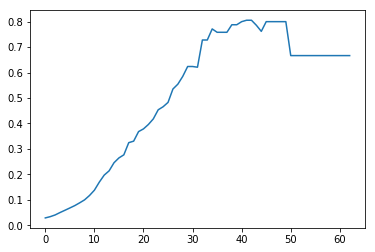

In [210]:
data = pd.read_csv('data/Bone-Cancer.csv')
print(data.shape)
data.columns = ['From','To']
tempWeight = [1 for i in range(data.shape[0])]
data['Weight'] = tempWeight
graph = nx.Graph()
for index,row in data.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = 1)
temp = nx.degree(graph)
arr = list(dict(temp).values())
hub = list(dict(temp).keys())[arr.index(max(arr))]
print(hub,nx.clustering(graph,nodes=hub))
# nx.clustering(graph,nodes=list(graph.neighbors(hub)))
# nx.degree(graph,nbunch=list(graph.neighbors(hub)))
temp=list(nx.rich_club_coefficient(graph,normalized=False).values())
plt.plot(temp)

(619, 2)
SMAD3


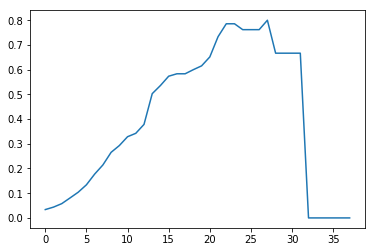

In [206]:
data = pd.read_csv('data/Bone-Normal.csv')
print(data.shape)
data.columns = ['From','To']
tempWeight = [1 for i in range(data.shape[0])]
data['Weight'] = tempWeight
graph = nx.Graph()
for index,row in data.iterrows():
    graph.add_edges_from([(row[0],row[1])],weight = 1)
temp = nx.degree(graph)
arr = list(dict(temp).values())
hub = list(dict(temp).keys())[arr.index(max(arr))]
print(hub)
# nx.clustering(graph,nodes=hub)
temp=list(nx.rich_club_coefficient(graph,normalized=False).values())
plt.plot(temp)

([<matplotlib.axis.XTick at 0x15083c8a710>,
 <a list of 351 Text xticklabel objects>)

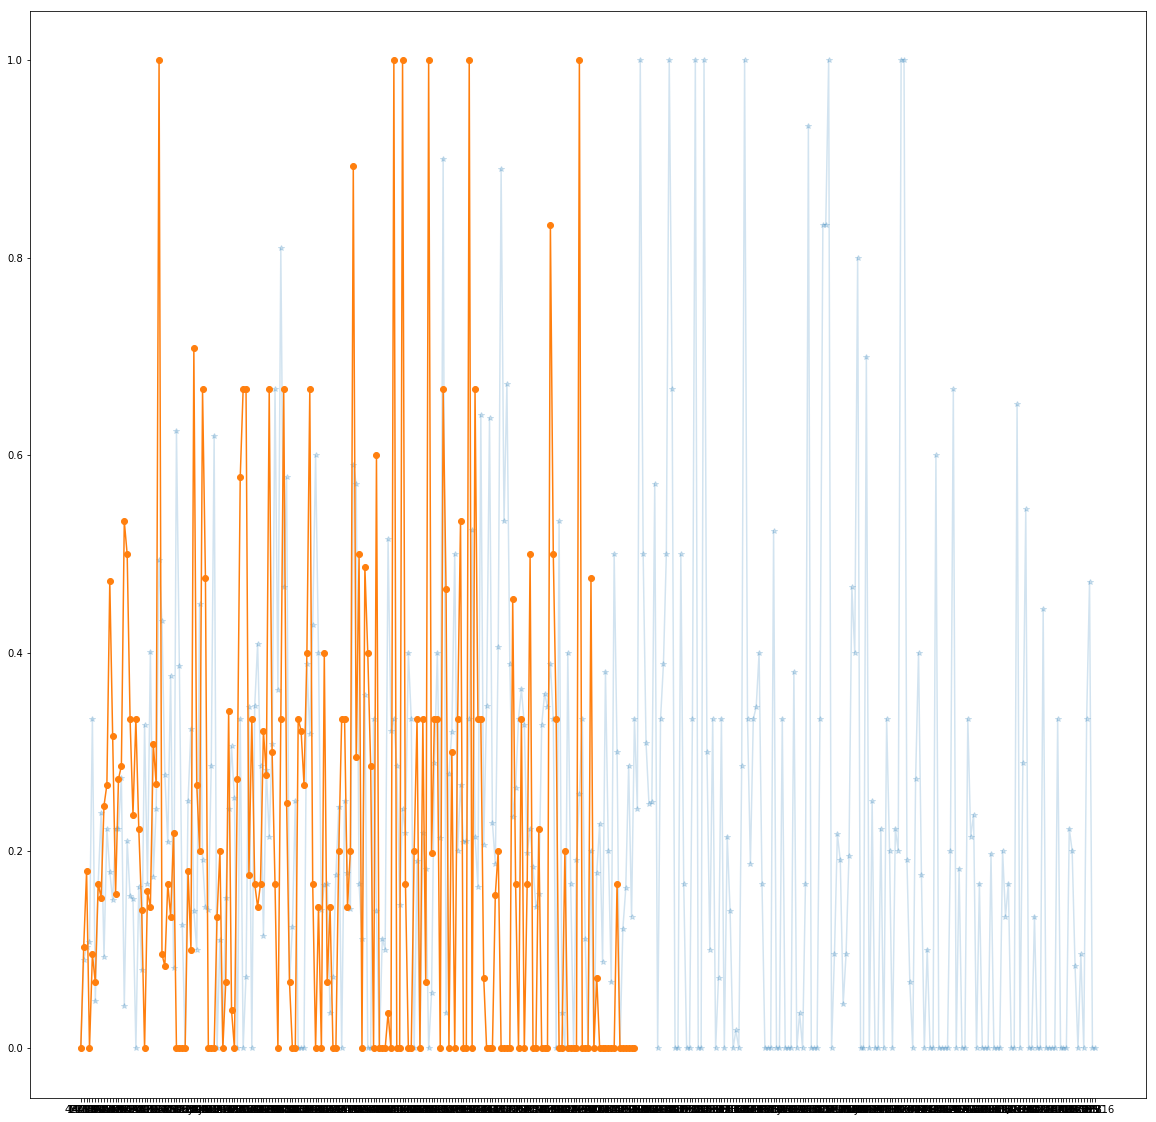

In [138]:
plt.figure(figsize=[20,20])
plt.plot(range(len(temp)), list(temp.values()),marker='*',alpha=0.2)
plt.plot(range(len(temp_normal)), list(temp_normal.values()),marker='o')
plt.xticks(range(len(temp)), list(temp.keys()))

In [115]:
data = pd.read_csv('GP-Miner_miner-gene-protein.tsv.gz', compression='gzip', sep='\t')
data

,# Gene,Protein
0,ENSG00000198888,ENSP00000354687
1,ENSG00000198763,ENSP00000355046
2,ENSG00000198804,ENSP00000354499
3,ENSG00000198712,ENSP00000354876
4,ENSG00000228253,ENSP00000355265
...,...,...
102445,ENSG00000282892,ENSP00000489099
102446,ENSG00000282892,ENSP00000489383
102447,ENSG00000282892,ENSP00000488932
102448,ENSG00000282981,ENSP00000488999


In [115]:
p_n = bone_n['# Protein-1'].append([bone_n['# Protein-2']]).reset_index().drop(['index'],axis=1)
p_n = get_count(p_n,0)
p_c = bone_c['# Protein-1'].append([bone_c['# Protein-2']]).reset_index().drop(['index'],axis=1)
p_c = get_count(p_c,0)

In [116]:
proteins = []
proteins.extend(p_n['Name'].to_list())
proteins.extend(p_c['Name'].to_list())
len(proteins)

933

In [117]:
proteins = set(proteins)
len(proteins)

640

In [118]:
names_n = p_n['Name'].to_list()
names_c = p_c['Name'].to_list()
upregulation = []
downregulation = []
for p in proteins:
    if p in names_n and p in names_c:
        diff = p_c['Count'][names_c.index(p)]/p_n['Count'][names_n.index(p)]
        arr.append(diff)
        
    elif p in names_n:
        downregulation.append([p,p_n['Count'][names_n.index(p)]])
    else:
        upregulation.append([p,p_c['Count'][names_c.index(p)]])
        
            


In [119]:
upregulation_df = pd.DataFrame(upregulation,columns=['Proteins','Value'])
upregulation_df

,Proteins,Value
0,GIPC,8
1,SOCS1,13
2,ARA54,2
3,USP9,1
4,FOXO3A,10
...,...,...
566,MMP7,2
567,POLR1A,5
568,IKBA,8
569,NRAS,23


In [141]:
downregulation_df = pd.DataFrame(downregulation,columns=['Proteins','Value'])
for i in upregulation_df['Proteins']:
    if i[0]=='D':
        print(i)

DOK1
DLL1
DAP
DTX1
DCP1A
DYRK1A
DAB2
DVL1
DDX3
DNM
DVL2
DAXX
DSP
DKK1
DVL3


C:\Users\Pratvi\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Pratvi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Pratvi\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


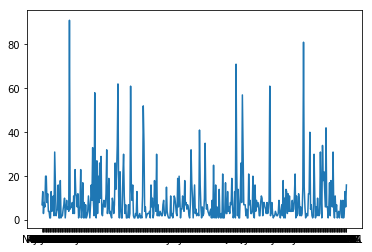

In [101]:
plt.plot(upregulation_df['Proteins'],upregulation_df['Value'])